## Easy

In [83]:
import pandas as pd

df = pd.read_pickle('./train.pickle')
list(df.keys())

['coords', 'labels', 'features', 'sizes']

In [84]:
df['labels']

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [85]:
X = df['features']
Y = df['labels']
X.shape, Y.shape

((34799, 32, 32, 3), (34799,))

In [86]:
X = X.reshape((34799, 32*32*3))
X.shape

(34799, 3072)

In [87]:
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.linear_model import LogisticRegression



In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [89]:
logres = LogisticRegression(max_iter = 100, multi_class = 'multinomial')
logres.fit(x_train, y_train)

c:\users\михаил\appdata\local\programs\python\python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [90]:
y_pred = logres.predict(x_test)
accuracy_score(y_test, y_pred)

0.9209195402298851

In [91]:
m = confusion_matrix(y_test, y_pred)
for i in range(43):
    print(i, m[i])

0 [36 13  0  0  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
1 [  1 492  19   2   5   4   0   3   4   0   0   0   0   1   0   1   0   0
   0   0   0   0   0   0   0   2   0   0   0   0   0   0   1   0   0   0
   0   0   0   0   0   0   0]
2 [  6  11 477   4   9   7   0   3   2   2   1   0   0   0   0   3   0   0
   1   1   0   0   0   0   0   0   0   0   1   0   0   4   0   0   0   0
   0   0   0   0   0   0   0]
3 [  1   4   5 280   2  18   2   0   1   3   2   1   0   0   0   1   1   0
   0   0   1   0   0   0   0   0   0   0   1   0   0   0   1   0   0   1
   0   0   0   0   0   0   0]
4 [  0  12  17   1 409   6   0   1   4   0   0   0   0   0   0   3   0   0
   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]
5 [  0   7   7  16   8 311   1   4   1   0   4   2   0   0   0   0   0   0
   1   0   1   0   0   0   0   1   0   0   0   0   0   0   0   1   0   0
   0  

In [92]:
labels = pd.read_csv('./label_names.csv')
labels

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


Как и можно было ожидать, больше всего модель путает знаки ограничения скорости (например, потому что различия у большинства из них - это всего лишь одна первая цифра). Матрица ошибок более информативна, чем accuracy_score, хотя и менее удобна. 

## Medium

In [93]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [94]:
for i in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(accuracy_score(y_test, y_pred), i)

0.9333333333333333 1
0.9074712643678161 2
0.8987356321839081 3
0.8819540229885058 4
0.8704597701149426 5


Ради интереса запустим цикл с разными значениями числа соседей. Из любопытного: чем больше соседей, тем больше ошибка. Вероятно, причина в тех самых знаках ограничения скорости

In [95]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
accuracy_score(y_test, y_pred)

0.3213793103448276

In [96]:
supvec = SVC(kernel = 'linear')
supvec.fit(x_train, y_train)
y_pred = supvec.predict(x_test)
accuracy_score(y_test, y_pred)

0.9573563218390805

In [97]:
supvec = SVC(kernel = 'poly')
supvec.fit(x_train, y_train)
y_pred = supvec.predict(x_test)
accuracy_score(y_test, y_pred)

0.7062068965517241

In [98]:
supvec = SVC(kernel = 'rbf')
supvec.fit(x_train, y_train)
y_pred = supvec.predict(x_test)
accuracy_score(y_test, y_pred)

0.8706896551724138

Выводы: RBF отработал хуже линейного ядра, вероятно, по той причине, что знаки ограничения скорости плохо отличаются друг от друга. Полиномиальное ядро могло банально переобучиться. Как мы еще видели до этого, логистическая регрессия тоже сама по себе неплохо справилась, что говорит о том, что данные, скорее всего, в целом линейны. Наивный баесовский классификатор, вероятно, в принципе не подходит для данной задачи (опять же, есть коллизия классов)

## Hard

То, для чего созданы функции в скрипте, называется аугментацией данных. Это удобно и логично. Очевидно, в процессе движения автомобиля положение знака изменяется относительно него, меняется угол поворота и расстояния. Чтобы учесть все эти факторы, на практике очень часто искусственно увеличивают имеющийся датасет как раз путем вращения, отражения и изменения цвета картинок. При желании можно для разметки (и в целом для классификации в дальнейшем) использовать GAN или дофайнтьюнить какую-то CV-модель побольше (например, Inception-v3 или ResNet50 из torchvision). Это относительно быстро и дешево. 

Что касается количества сэмплов, необходимо уравнять доли знаков ограничения скорости и увеличить их в общем объёме. Например, разница в количестве знаков с ограничением в 20км/ч и 30 км/ч - порядка 10-15 раз. Из-за этого на знаках с 20 модель (в процентном отношении) сильно ошибается. 

На практике попробуем сделать аугментацию для знаков в 20км/ч и посмотрим, как с этим справится SVC с линейным ядром (мы конечно не проводили кросс-валидацию, но с учетом достаточно объемного датасета для train и test можно в целом предполагать, что значение accuracy достаточно близко к среднему при кросс-валидации).

In [99]:
counts = []
for i in range(43):
    cnt = 0
    for elem in Y:
        if elem == i:
            cnt += 1
    counts.append(cnt)

<BarContainer object of 43 artists>

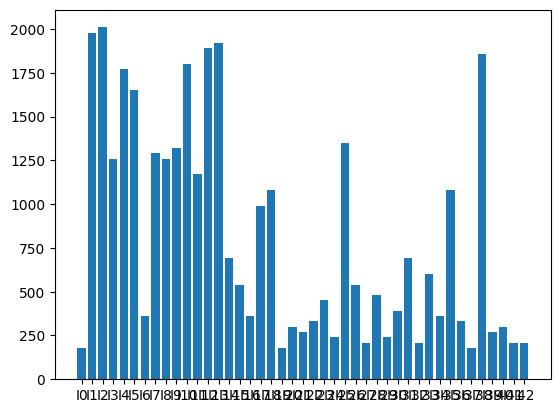

In [100]:
indices = [f"I{i}" for i in range(43)]
plt.bar(indices, counts)

Как мы видим, какие-то классы представлены в количестве почти 2000 во всей выборке, а каких-то меньше 250. Я бы предложил применить аугментацию к тем классам, элементы которых, например, представлены в количестве < 500. Параллельно с этим можно ограничить количество самых больших классов, например, 1500. Тогда выборка будет относительно репрезентативной.